In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
import numpy as np

# Scatter Plots with plt.plot

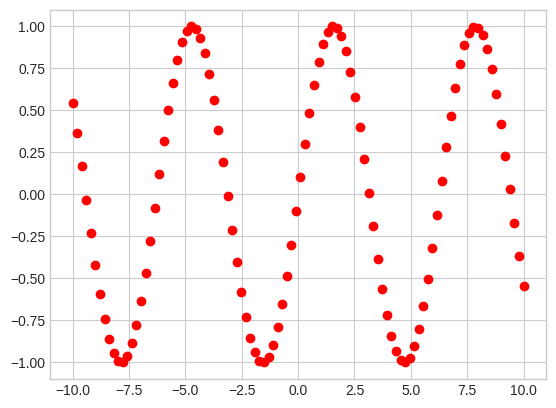

In [ ]:
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,'o',color = 'red')

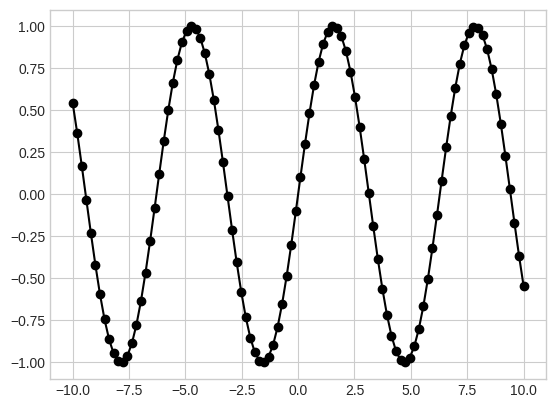

In [ ]:
plt.plot(x,y,'-ok')

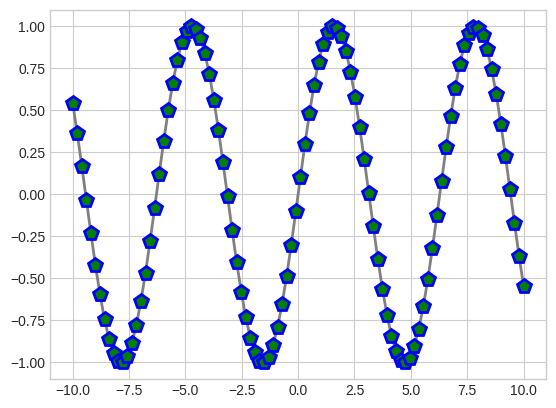

In [ ]:
plt.plot(x,y,'-p', color = 'gray',markersize = 10, linewidth =2,markerfacecolor = 'green', markeredgecolor = 'blue',markeredgewidth = 2);

# Scatter Plots with plt.scatter

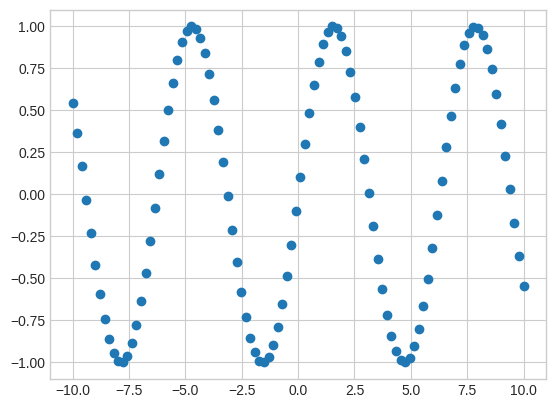

In [ ]:
plt.scatter(x,y,marker = 'o')

**The primary difference of plt.scatter from plt.plot is that it can be used to create
scatter plots where the properties of each individual point (size, face color, edge color,
etc.) can be individually controlled or mapped to data.**

* plot Versus scatter: A Note on Efficiency
Aside from the different features available in plt.plot and plt.scatter, why might
you choose to use one over the other? While it doesn’t matter as much for small
amounts of data, as datasets get larger than a few thousand points, plt.plot can be
noticeably more efficient than plt.scatter. The reason is that plt.scatter has the
capability to render a different size and/or color for each point, so the renderer must
do the extra work of constructing each point individually. With plt.plot, on the
other hand, the markers for each point are guaranteed to be identical, so the work of
determining the appearance of the points is done only once for the entire set of data.
For large datasets, this difference can lead to vastly different performance, and for
this reason, plt.plot should be preferred over plt.scatter for large datasets.

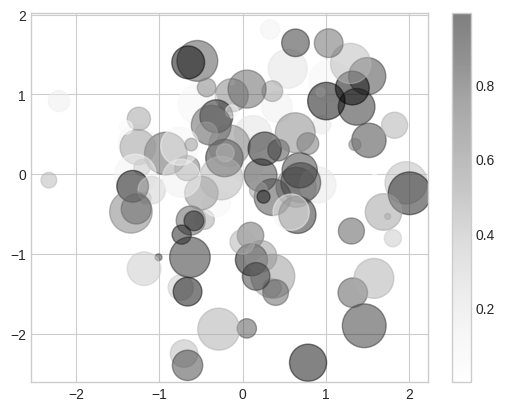

In [ ]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)
plt.scatter(x,y,c=colors,s=sizes,alpha=0.5)
plt.colorbar()

Text(0, 0.5, 'sepal width (cm)')

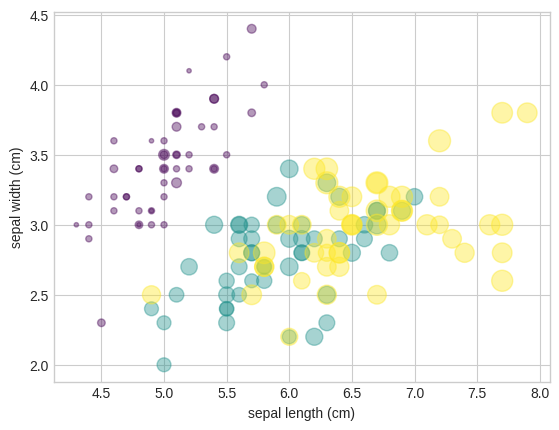

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.4,
s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [ ]:
features.shape

(4, 150)

**Visualizing Uncertainties**

* For any scientific measurement, accurate accounting of uncertainties is nearly as
important, if not more so, as accurate reporting of the number itself. For example,
imagine that I am using some astrophysical observations to estimate the Hubble Con‐
stant, the local measurement of the expansion rate of the Universe. I know that the
current literature suggests a value of around 70 (km/s)/Mpc, and I measure a value of
74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer,
given this information, is this: there is no way to know.

**Basic Errorbars**

<ErrorbarContainer object of 3 artists>

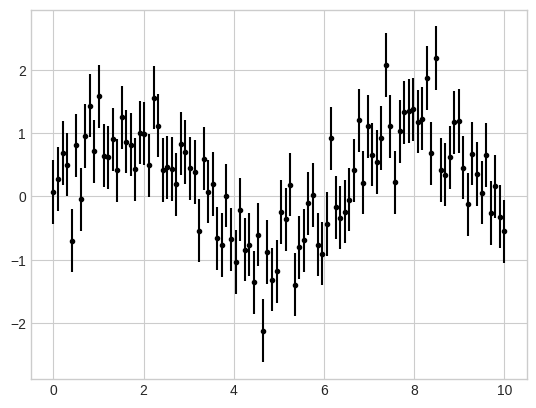

In [ ]:
x = np.linspace(0,10,100)
dy = 0.5
y = np.sin(x)  +  0.5 * np.random.randn(100)
plt.errorbar(x,y,yerr = dy,fmt = '.k')

<ErrorbarContainer object of 3 artists>

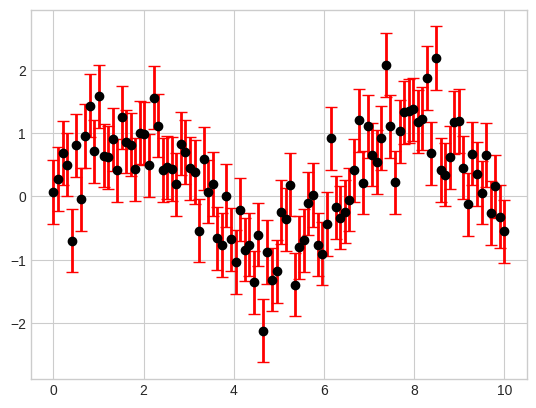

In [ ]:
plt.errorbar(x,y,yerr = dy, fmt = 'o',color = 'black',ecolor = 'red',elinewidth = 2,capsize = 4)

**Continuous Errors**

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor


In [ ]:
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)


In [ ]:
# Compute the Gaussian process fit
gp = GaussianProcessRegressor();
gp.fit(xdata[:, np.newaxis], ydata);

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std = True)
dyfit.shape

(1000,)

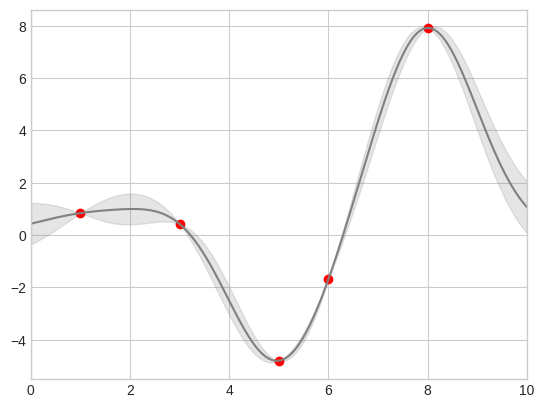

In [ ]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,color='gray', alpha=0.2)
plt.xlim(0, 10);
